In [1]:
import os
os.getcwd()

'C:\\Users\\has91\\anaconda3\\DataScience\\project\\code'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system..')
    
import numpy as np


import plotly_express as px
import seaborn as sns

In [4]:
TeamStats = pd.read_csv('../data/LCK_2021_Match_data/LCK 2021 Summer - Team Stats - OraclesElixir.csv')
TeamStats.head()

,Team,GP,W,L,AGT,K,D,KD,CKPM,GPR,...,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%,WPM,CWPM,WCPM
0,Afreeca Freecs,39,19,20,35.7,427,434,0.98,0.62,0.13,...,51%,51%,67%,33%,46%,50.4%,47.5%,3.87,1.48,2.03
1,DRX,36,8,28,32.7,317,521,0.61,0.71,-0.73,...,39%,35%,0%,25%,21%,49.7%,48.9%,3.46,1.39,1.67
2,DWG KIA,39,25,14,32.4,544,471,1.15,0.80,0.26,...,44%,57%,20%,64%,73%,49.3%,53.0%,3.72,1.53,1.73
3,Fredit BRION,42,18,24,33.1,422,450,0.94,0.63,-0.56,...,69%,56%,71%,38%,39%,49.7%,49.1%,4.02,1.67,1.95
4,Gen.G,36,22,14,33.2,488,381,1.28,0.72,0.10,...,53%,56%,67%,53%,60%,50.7%,51.2%,3.84,1.64,1.88


In [5]:
LCK_Summer = pd.read_excel('../data/LCK_2021_Match_data/url_LCK2021_SeasonSummer_Season.xlsx')
LCK_Summer.head()

,gamedate,gameduration,Play_side,W/L,Total_gold,Total_kill,Ban,Ban.1,Ban.2,Ban.3,...,Wards Placed,Wards Destroyed,Stealth Wards Purchased,Control Wards Purchased,Gold Earned,Gold Spent,Minions Killed,Neutral Minions Killed,Neutral Minions Killed in Team's Jungle,Neutral Minions Killed in Enemy Jungle
0,6/9/2021,36:11,blue,VICTORY,70.2k,19,Nocturne,Udyr,Rumble,Ezreal,...,14,11,-,9,14.0k,12.3k,285,24,1,16
1,6/9/2021,36:11,blue,VICTORY,70.2k,19,Nocturne,Udyr,Rumble,Ezreal,...,16,16,-,14,12.2k,11.7k,46,176,122,4
2,6/9/2021,36:11,blue,VICTORY,70.2k,19,Nocturne,Udyr,Rumble,Ezreal,...,16,22,-,12,19.6k,18.4k,324,52,43,5
3,6/9/2021,36:11,blue,VICTORY,70.2k,19,Nocturne,Udyr,Rumble,Ezreal,...,42,20,-,5,15.4k,13.6k,327,20,12,4
4,6/9/2021,36:11,blue,VICTORY,70.2k,19,Nocturne,Udyr,Rumble,Ezreal,...,54,16,-,16,9.0k,7.9k,47,-,-,-


In [6]:
LCK_Summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   gamedate                                 1920 non-null   object
 1   gameduration                             1920 non-null   object
 2   Play_side                                1920 non-null   object
 3   W/L                                      1920 non-null   object
 4   Total_gold                               1920 non-null   object
 5   Total_kill                               1920 non-null   int64 
 6   Ban                                      1920 non-null   object
 7   Ban.1                                    1920 non-null   object
 8   Ban.2                                    1920 non-null   object
 9   Ban.3                                    1920 non-null   object
 10  Ban.4                                    1920 non-null   obj

In [9]:
# 사용하지않을 컬럼 제외
LCK_Summer_Use = LCK_Summer[['gamedate','Play_side','W/L','Total_gold','Total_kill','Towers Destroyed','Inhibtors Destroyed','Baron','Dragon','Rift Heralds Slain','Team Player','KDA','Total Damage to Champions','Total Damage Dealt','Total Damage to Objectives','Total Damage to Turrets','Wards Placed','Wards Destroyed','Control Wards Purchased','Minions Killed']]
LCK_Summer_Use.head()

,gamedate,Play_side,W/L,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,Rift Heralds Slain,Team Player,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed,Wards Destroyed,Control Wards Purchased,Minions Killed
0,6/9/2021,blue,VICTORY,70.2k,19,10,1,1,4,2,BRO Hoya,2/0/9,20.0k,196.1k,10.7k,2.9k,14,11,9,285
1,6/9/2021,blue,VICTORY,70.2k,19,10,1,1,4,2,BRO UmTi,2/3/13,11.6k,216.6k,35.3k,1.0k,16,16,14,46
2,6/9/2021,blue,VICTORY,70.2k,19,10,1,1,4,2,BRO Lava,11/0/5,22.3k,290.2k,17.6k,8.7k,16,22,12,324
3,6/9/2021,blue,VICTORY,70.2k,19,10,1,1,4,2,BRO Hena,3/1/10,9.7k,223.5k,27.3k,4.7k,42,20,5,327
4,6/9/2021,blue,VICTORY,70.2k,19,10,1,1,4,2,BRO Delight,1/2/11,5.3k,37.1k,6.8k,0.9k,54,16,16,47


In [10]:
# 사용할 컬럼만 지정 후 엑셀로 저장
LCK_Summer_Use.to_excel('../data/LCK_2021_Match_data/LCK_Summer_Use.xlsx', index = False)

In [11]:
LCK_Summer_Use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gamedate                    1920 non-null   object
 1   Play_side                   1920 non-null   object
 2   W/L                         1920 non-null   object
 3   Total_gold                  1920 non-null   object
 4   Total_kill                  1920 non-null   int64 
 5   Towers Destroyed            1920 non-null   int64 
 6   Inhibtors Destroyed         1920 non-null   int64 
 7   Baron                       1920 non-null   int64 
 8   Dragon                      1920 non-null   int64 
 9   Rift Heralds Slain          1920 non-null   object
 10  Team Player                 1920 non-null   object
 11  KDA                         1920 non-null   object
 12  Total Damage to Champions   1920 non-null   object
 13  Total Damage Dealt          1920 non-null   obje

In [12]:
# KDA만 추출
LCK_KDA = LCK_Summer_Use[['Team Player','KDA']]
LCK_KDA

,Team Player,KDA
0,BRO Hoya,2/0/9
1,BRO UmTi,2/3/13
2,BRO Lava,11/0/5
3,BRO Hena,3/1/10
4,BRO Delight,1/2/11
...,...,...
1915,LSB Summit,6/2/5
1916,LSB Croco,2/1/9
1917,LSB FATE,1/1/4
1918,LSB Prince,3/0/6


In [13]:
# K /  D / A 분류하여 숫자형으로 변환
LCK_KDA['K'] = LCK_KDA.KDA.str.split('/').str[0].apply(pd.to_numeric)
LCK_KDA['D'] = LCK_KDA.KDA.str.split('/').str[1].apply(pd.to_numeric)
LCK_KDA['A'] = LCK_KDA.KDA.str.split('/').str[2].apply(pd.to_numeric)
LCK_KDA.head()

<ipython-input-13-f47ce92a0c53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_KDA['K'] = LCK_KDA.KDA.str.split('/').str[0].apply(pd.to_numeric)
<ipython-input-13-f47ce92a0c53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_KDA['D'] = LCK_KDA.KDA.str.split('/').str[1].apply(pd.to_numeric)
<ipython-input-13-f47ce92a0c53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Team Player,KDA,K,D,A
0,BRO Hoya,2/0/9,2,0.0,9.0
1,BRO UmTi,2/3/13,2,3.0,13.0
2,BRO Lava,11/0/5,11,0.0,5.0
3,BRO Hena,3/1/10,3,1.0,10.0
4,BRO Delight,1/2/11,1,2.0,11.0


In [14]:
LCK_KDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Team Player  1920 non-null   object 
 1   KDA          1920 non-null   object 
 2   K            1920 non-null   int64  
 3   D            1910 non-null   float64
 4   A            1910 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 75.1+ KB


In [15]:
# 데스가 0인 플레이어만 추출
LCK_KDA_DZ = LCK_KDA[LCK_KDA['D']== 0]
LCK_KDA_DZ

,Team Player,KDA,K,D,A
0,BRO Hoya,2/0/9,2,0.0,9.0
2,BRO Lava,11/0/5,11,0.0,5.0
16,BRO UmTi,4/0/9,4,0.0,9.0
20,T1 Canna,7/0/5,7,0.0,5.0
23,T1 Teddy,4/0/10,4,0.0,10.0
...,...,...,...,...,...
1888,DK Ghost,7/0/6,7,0.0,6.0
1898,DK Ghost,5/0/8,5,0.0,8.0
1902,LSB FATE,1/0/10,1,0.0,10.0
1903,LSB Prince,5/0/8,5,0.0,8.0


In [16]:
# 데스가 0인 플레이어의 KDA 계산 (킬 + 어시스트 * 1.2)
LCK_KDA['KDA_1'] = (LCK_KDA_DZ['K'] + LCK_KDA_DZ['A'])*1.2
LCK_KDA

<ipython-input-16-7f9ec5061472>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_KDA['KDA_1'] = (LCK_KDA_DZ['K'] + LCK_KDA_DZ['A'])*1.2


,Team Player,KDA,K,D,A,KDA_1
0,BRO Hoya,2/0/9,2,0.0,9.0,13.2
1,BRO UmTi,2/3/13,2,3.0,13.0,NaN
2,BRO Lava,11/0/5,11,0.0,5.0,19.2
3,BRO Hena,3/1/10,3,1.0,10.0,NaN
4,BRO Delight,1/2/11,1,2.0,11.0,NaN
...,...,...,...,...,...,...
1915,LSB Summit,6/2/5,6,2.0,5.0,NaN
1916,LSB Croco,2/1/9,2,1.0,9.0,NaN
1917,LSB FATE,1/1/4,1,1.0,4.0,NaN
1918,LSB Prince,3/0/6,3,0.0,6.0,10.8


In [17]:
# 데스가 0이 아닌 플레이어만 추출
LCK_KDA_NDZ = LCK_KDA[LCK_KDA['D']!= 0]
LCK_KDA_NDZ

,Team Player,KDA,K,D,A,KDA_1
1,BRO UmTi,2/3/13,2,3.0,13.0,NaN
3,BRO Hena,3/1/10,3,1.0,10.0,NaN
4,BRO Delight,1/2/11,1,2.0,11.0,NaN
5,LSB Summit,3/2/1,3,2.0,1.0,NaN
6,LSB Croco,1/6/4,1,6.0,4.0,NaN
...,...,...,...,...,...,...
1914,HLE Vsta,1/2/6,1,2.0,6.0,NaN
1915,LSB Summit,6/2/5,6,2.0,5.0,NaN
1916,LSB Croco,2/1/9,2,1.0,9.0,NaN
1917,LSB FATE,1/1/4,1,1.0,4.0,NaN


In [18]:
# 데스가 0이 아닌 플레이어들의 KDA 계산
LCK_KDA['KDA_2'] = (LCK_KDA_NDZ['K'] + LCK_KDA_NDZ['A'])/LCK_KDA_NDZ['D']
LCK_KDA.head()

<ipython-input-18-f41fa0a26d48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_KDA['KDA_2'] = (LCK_KDA_NDZ['K'] + LCK_KDA_NDZ['A'])/LCK_KDA_NDZ['D']


,Team Player,KDA,K,D,A,KDA_1,KDA_2
0,BRO Hoya,2/0/9,2,0.0,9.0,13.2,NaN
1,BRO UmTi,2/3/13,2,3.0,13.0,NaN,5.0
2,BRO Lava,11/0/5,11,0.0,5.0,19.2,NaN
3,BRO Hena,3/1/10,3,1.0,10.0,NaN,13.0
4,BRO Delight,1/2/11,1,2.0,11.0,NaN,6.0


In [19]:
KDA_1 = (LCK_KDA_DZ['K'] + LCK_KDA_DZ['A'])*1.2
KDA_2 = (LCK_KDA_NDZ['K'] + LCK_KDA_NDZ['A'])/LCK_KDA_NDZ['D']

In [20]:
# KDA 계산(데스가 0과 0이 아닌 플레이어의 KDA 계산 후 합산)
LCK_KDA['KDA_C'] = pd.concat([KDA_1,KDA_2], join='inner')
LCK_KDA

<ipython-input-20-456368813425>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_KDA['KDA_C'] = pd.concat([KDA_1,KDA_2], join='inner')


,Team Player,KDA,K,D,A,KDA_1,KDA_2,KDA_C
0,BRO Hoya,2/0/9,2,0.0,9.0,13.2,NaN,13.2
1,BRO UmTi,2/3/13,2,3.0,13.0,NaN,5.0,5.0
2,BRO Lava,11/0/5,11,0.0,5.0,19.2,NaN,19.2
3,BRO Hena,3/1/10,3,1.0,10.0,NaN,13.0,13.0
4,BRO Delight,1/2/11,1,2.0,11.0,NaN,6.0,6.0
...,...,...,...,...,...,...,...,...
1915,LSB Summit,6/2/5,6,2.0,5.0,NaN,5.5,5.5
1916,LSB Croco,2/1/9,2,1.0,9.0,NaN,11.0,11.0
1917,LSB FATE,1/1/4,1,1.0,4.0,NaN,5.0,5.0
1918,LSB Prince,3/0/6,3,0.0,6.0,10.8,NaN,10.8


In [22]:
LCK_Summer_Use['KDA'] = LCK_KDA['KDA_C']
LCK_Summer_Use.head()

<ipython-input-22-bf774c250150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_Summer_Use['KDA'] = LCK_KDA['KDA_C']


,gamedate,Play_side,W/L,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,Rift Heralds Slain,Team Player,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed,Wards Destroyed,Control Wards Purchased,Minions Killed
0,6/9/2021,blue,VICTORY,70.2k,19,10,1,1,4,2,BRO Hoya,13.2,20.0k,196.1k,10.7k,2.9k,14,11,9,285
1,6/9/2021,blue,VICTORY,70.2k,19,10,1,1,4,2,BRO UmTi,5.0,11.6k,216.6k,35.3k,1.0k,16,16,14,46
2,6/9/2021,blue,VICTORY,70.2k,19,10,1,1,4,2,BRO Lava,19.2,22.3k,290.2k,17.6k,8.7k,16,22,12,324
3,6/9/2021,blue,VICTORY,70.2k,19,10,1,1,4,2,BRO Hena,13.0,9.7k,223.5k,27.3k,4.7k,42,20,5,327
4,6/9/2021,blue,VICTORY,70.2k,19,10,1,1,4,2,BRO Delight,6.0,5.3k,37.1k,6.8k,0.9k,54,16,16,47


In [23]:
LCK_Summer_Use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gamedate                    1920 non-null   object 
 1   Play_side                   1920 non-null   object 
 2   W/L                         1920 non-null   object 
 3   Total_gold                  1920 non-null   object 
 4   Total_kill                  1920 non-null   int64  
 5   Towers Destroyed            1920 non-null   int64  
 6   Inhibtors Destroyed         1920 non-null   int64  
 7   Baron                       1920 non-null   int64  
 8   Dragon                      1920 non-null   int64  
 9   Rift Heralds Slain          1920 non-null   object 
 10  Team Player                 1920 non-null   object 
 11  KDA                         1910 non-null   float64
 12  Total Damage to Champions   1920 non-null   object 
 13  Total Damage Dealt          1920 

In [24]:
# 숫자형으로 변환
LCK_Summer_Use['Total_gold'] = LCK_Summer_Use['Total_gold'].str.strip('k').apply(pd.to_numeric)
LCK_Summer_Use['Total Damage to Champions'] = LCK_Summer_Use['Total Damage to Champions'].str.strip('k').apply(pd.to_numeric)
LCK_Summer_Use['Total Damage Dealt'] = LCK_Summer_Use['Total Damage Dealt'].str.strip('k').apply(pd.to_numeric)
LCK_Summer_Use['Total Damage to Objectives'] = LCK_Summer_Use['Total Damage to Objectives'].str.strip('k').apply(pd.to_numeric)
LCK_Summer_Use['Total Damage to Turrets'] = LCK_Summer_Use['Total Damage to Turrets'].str.strip('k').apply(pd.to_numeric)
LCK_Summer_Use

<ipython-input-24-468d0dbb22f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_Summer_Use['Total_gold'] = LCK_Summer_Use['Total_gold'].str.strip('k').apply(pd.to_numeric)
<ipython-input-24-468d0dbb22f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_Summer_Use['Total Damage to Champions'] = LCK_Summer_Use['Total Damage to Champions'].str.strip('k').apply(pd.to_numeric)
<ipython-input-24-468d0dbb22f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,gamedate,Play_side,W/L,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,Rift Heralds Slain,Team Player,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed,Wards Destroyed,Control Wards Purchased,Minions Killed
0,6/9/2021,blue,VICTORY,70.2,19,10,1,1,4,2,BRO Hoya,13.2,20.0,196.1,10.7,2.9,14,11,9,285
1,6/9/2021,blue,VICTORY,70.2,19,10,1,1,4,2,BRO UmTi,5.0,11.6,216.6,35.3,1.0,16,16,14,46
2,6/9/2021,blue,VICTORY,70.2,19,10,1,1,4,2,BRO Lava,19.2,22.3,290.2,17.6,8.7,16,22,12,324
3,6/9/2021,blue,VICTORY,70.2,19,10,1,1,4,2,BRO Hena,13.0,9.7,223.5,27.3,4.7,42,20,5,327
4,6/9/2021,blue,VICTORY,70.2,19,10,1,1,4,2,BRO Delight,6.0,5.3,37.1,6.8,0.9,54,16,16,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,8/5/2021,red,VICTORY,58.6,14,8,1,1,5,0,LSB Summit,5.5,28.5,211.5,19.1,4.5,8,9,4,254
1916,8/5/2021,red,VICTORY,58.6,14,8,1,1,5,0,LSB Croco,11.0,9.7,109.3,21.4,1.7,13,12,12,13
1917,8/5/2021,red,VICTORY,58.6,14,8,1,1,5,0,LSB FATE,5.0,15.0,193.1,16.0,5.5,15,8,7,268
1918,8/5/2021,red,VICTORY,58.6,14,8,1,1,5,0,LSB Prince,10.8,8.7,204.5,19.6,5.9,27,5,5,295


In [26]:
LCK_Summer_Use.to_excel('../data/LCK_2021_Match_data/LCK_Summer_Use_Final.xlsx', index = False)

================================================================================

In [27]:
LCK_Summer_Use = pd.read_excel('../data/LCK_2021_Match_data/LCK_Summer_Use_Final.xlsx')
LCK_Summer_Use.head()

,gamedate,Play_side,W/L,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,Rift Heralds Slain,Team Player,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed,Wards Destroyed,Control Wards Purchased,Minions Killed
0,6/9/2021,blue,VICTORY,70.2,19,10,1,1,4,2,BRO Hoya,13.2,20.0,196.1,10.7,2.9,14,11,9,285
1,6/9/2021,blue,VICTORY,70.2,19,10,1,1,4,2,BRO UmTi,5.0,11.6,216.6,35.3,1.0,16,16,14,46
2,6/9/2021,blue,VICTORY,70.2,19,10,1,1,4,2,BRO Lava,19.2,22.3,290.2,17.6,8.7,16,22,12,324
3,6/9/2021,blue,VICTORY,70.2,19,10,1,1,4,2,BRO Hena,13.0,9.7,223.5,27.3,4.7,42,20,5,327
4,6/9/2021,blue,VICTORY,70.2,19,10,1,1,4,2,BRO Delight,6.0,5.3,37.1,6.8,0.9,54,16,16,47


In [28]:
LCK_Summer_Use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gamedate                    1920 non-null   object 
 1   Play_side                   1920 non-null   object 
 2   W/L                         1920 non-null   object 
 3   Total_gold                  1920 non-null   float64
 4   Total_kill                  1920 non-null   int64  
 5   Towers Destroyed            1920 non-null   int64  
 6   Inhibtors Destroyed         1920 non-null   int64  
 7   Baron                       1920 non-null   int64  
 8   Dragon                      1920 non-null   int64  
 9   Rift Heralds Slain          1920 non-null   object 
 10  Team Player                 1920 non-null   object 
 11  KDA                         1910 non-null   float64
 12  Total Damage to Champions   1920 non-null   float64
 13  Total Damage Dealt          1920 

In [29]:
LCK_GEN = LCK_Summer_Use[LCK_Summer_Use['Team Player'].str.contains('GEN')] #1
LCK_KT = LCK_Summer_Use[LCK_Summer_Use['Team Player'].str.contains('KT')] #2
LCK_T1 = LCK_Summer_Use[LCK_Summer_Use['Team Player'].str.contains('T1')] #3
LCK_HLE = LCK_Summer_Use[LCK_Summer_Use['Team Player'].str.contains('HLE')] #4
LCK_NS = LCK_Summer_Use[LCK_Summer_Use['Team Player'].str.contains('NS')] #5
LCK_LSB = LCK_Summer_Use[LCK_Summer_Use['Team Player'].str.contains('LSB')] #6
LCK_DRX = LCK_Summer_Use[LCK_Summer_Use['Team Player'].str.contains('DRX')] #7
LCK_AF = LCK_Summer_Use[LCK_Summer_Use['Team Player'].str.contains('AF')] #8
LCK_BRO = LCK_Summer_Use[LCK_Summer_Use['Team Player'].str.contains('BRO')] #9
LCK_DK = LCK_Summer_Use[LCK_Summer_Use['Team Player'].str.contains('DK')] #10

# 10개팀 레드진영, 블루진영 승률 비교

## Gen.G

In [30]:
# LCK_GEN

LCK_GEN_Vic = LCK_GEN[LCK_GEN['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_GEN_Vic))
print(len(LCK_GEN['W/L'])) # 전체 경기수

LCK_GEN_Red = LCK_GEN[LCK_GEN['Play_side'].str.contains('red')] #red 진영
LCK_GEN_Blue = LCK_GEN[LCK_GEN['Play_side'].str.contains('blue')] #blue 진영

LCK_GEN_Red_Vic = LCK_GEN_Red[LCK_GEN_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_GEN_Blue_Vic = LCK_GEN_Blue[LCK_GEN_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_GEN_Red_Vic))
print(len(LCK_GEN_Blue_Vic))

110
180
90
20


In [31]:
LCK_GEN_Vic_Per = len(LCK_GEN_Vic) / len(LCK_GEN['W/L']) # 전체 승률
LCK_GEN_Red_Vic_Per = len(LCK_GEN_Red_Vic) / len(LCK_GEN_Red) #red 진영 승률
LCK_GEN_Blue_Vic_Per = len(LCK_GEN_Blue_Vic) / len(LCK_GEN_Blue) #blue 진영 승률

print(LCK_GEN_Vic_Per)
print(LCK_GEN_Red_Vic_Per)
print(LCK_GEN_Blue_Vic_Per)

0.6111111111111112
0.6428571428571429
0.5


## kt Rolster

In [32]:
# LCK_KT

LCK_KT_Vic = LCK_KT[LCK_KT['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_KT_Vic))
print(len(LCK_KT['W/L'])) # 전체 경기수

LCK_KT_Red = LCK_KT[LCK_KT['Play_side'].str.contains('red')] #red 진영
LCK_KT_Blue = LCK_KT[LCK_KT['Play_side'].str.contains('blue')] #blue 진영

LCK_KT_Red_Vic = LCK_KT_Red[LCK_KT_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_KT_Blue_Vic = LCK_KT_Blue[LCK_KT_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_KT_Red_Vic))
print(len(LCK_KT_Blue_Vic))

80
185
35
45


In [33]:
LCK_KT_Vic_Per = len(LCK_KT_Vic) / len(LCK_KT['W/L']) # 전체 승률
LCK_KT_Red_Vic_Per = len(LCK_KT_Red_Vic) / len(LCK_KT_Red) #red 진영 승률
LCK_KT_Blue_Vic_Per = len(LCK_KT_Blue_Vic) / len(LCK_KT_Blue) #blue 진영 승률

print(LCK_KT_Vic_Per)
print(LCK_KT_Red_Vic_Per)
print(LCK_KT_Blue_Vic_Per)

0.43243243243243246
0.4375
0.42857142857142855


## Hanwha Life Esports

In [34]:
# LCK_HLE

LCK_HLE_Vic = LCK_HLE[LCK_HLE['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_HLE_Vic))
print(len(LCK_HLE['W/L'])) # 전체 경기수

LCK_HLE_Red = LCK_HLE[LCK_HLE['Play_side'].str.contains('red')] #red 진영
LCK_HLE_Blue = LCK_HLE[LCK_HLE['Play_side'].str.contains('blue')] #blue 진영

LCK_HLE_Red_Vic = LCK_HLE_Red[LCK_HLE_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_HLE_Blue_Vic = LCK_HLE_Blue[LCK_HLE_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_HLE_Red_Vic))
print(len(LCK_HLE_Blue_Vic))

75
195
35
40


In [35]:
LCK_HLE_Vic_Per = len(LCK_HLE_Vic) / len(LCK_HLE['W/L']) # 전체 승률
LCK_HLE_Red_Vic_Per = len(LCK_HLE_Red_Vic) / len(LCK_HLE_Red) #red 진영 승률
LCK_HLE_Blue_Vic_Per = len(LCK_HLE_Blue_Vic) / len(LCK_HLE_Blue) #blue 진영 승률

print(LCK_HLE_Vic_Per)
print(LCK_HLE_Red_Vic_Per)
print(LCK_HLE_Blue_Vic_Per)

0.38461538461538464
0.3684210526315789
0.4


## DWG KIA

In [36]:
# LCK_DK

LCK_DK_Vic = LCK_DK[LCK_DK['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_DK_Vic))
print(len(LCK_DK['W/L'])) # 전체 경기수

LCK_DK_Red = LCK_DK[LCK_DK['Play_side'].str.contains('red')] #red 진영
LCK_DK_Blue = LCK_DK[LCK_DK['Play_side'].str.contains('blue')] #blue 진영

LCK_DK_Red_Vic = LCK_DK_Red[LCK_DK_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_DK_Blue_Vic = LCK_DK_Blue[LCK_DK_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_DK_Red_Vic))
print(len(LCK_DK_Blue_Vic))

125
195
65
60


In [37]:
LCK_DK_Vic_Per = len(LCK_DK_Vic) / len(LCK_DK['W/L']) # 전체 승률
LCK_DK_Red_Vic_Per = len(LCK_DK_Red_Vic) / len(LCK_DK_Red) #red 진영 승률
LCK_DK_Blue_Vic_Per = len(LCK_DK_Blue_Vic) / len(LCK_DK_Blue) #blue 진영 승률

print(LCK_DK_Vic_Per)
print(LCK_DK_Red_Vic_Per)
print(LCK_DK_Blue_Vic_Per)

0.6410256410256411
0.6190476190476191
0.6666666666666666


## T1

In [38]:
# LCK_T1

LCK_T1_Vic = LCK_T1[LCK_T1['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_T1_Vic))
print(len(LCK_T1['W/L'])) # 전체 경기수

LCK_T1_Red = LCK_T1[LCK_T1['Play_side'].str.contains('red')] #red 진영
LCK_T1_Blue = LCK_T1[LCK_T1['Play_side'].str.contains('blue')] #blue 진영

LCK_T1_Red_Vic = LCK_T1_Red[LCK_T1_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_T1_Blue_Vic = LCK_T1_Blue[LCK_T1_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_T1_Red_Vic))
print(len(LCK_T1_Blue_Vic))

105
175
40
65


In [39]:
LCK_T1_Vic_Per = len(LCK_T1_Vic) / len(LCK_T1['W/L']) # 전체 승률
LCK_T1_Red_Vic_Per = len(LCK_T1_Red_Vic) / len(LCK_T1_Red) #red 진영 승률
LCK_T1_Blue_Vic_Per = len(LCK_T1_Blue_Vic) / len(LCK_T1_Blue) #blue 진영 승률

print(LCK_T1_Vic_Per)
print(LCK_T1_Red_Vic_Per)
print(LCK_T1_Blue_Vic_Per)

0.6
0.5333333333333333
0.65


## DRX

In [40]:
# LCK_DRX

LCK_DRX_Vic = LCK_DRX[LCK_DRX['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_DRX_Vic))
print(len(LCK_DRX['W/L'])) # 전체 경기수

LCK_DRX_Red = LCK_DRX[LCK_DRX['Play_side'].str.contains('red')] #red 진영
LCK_DRX_Blue = LCK_DRX[LCK_DRX['Play_side'].str.contains('blue')] #blue 진영

LCK_DRX_Red_Vic = LCK_DRX_Red[LCK_DRX_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_DRX_Blue_Vic = LCK_DRX_Blue[LCK_DRX_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_DRX_Red_Vic))
print(len(LCK_DRX_Blue_Vic))

40
180
15
25


In [41]:
LCK_DRX_Vic_Per = len(LCK_DRX_Vic) / len(LCK_DRX['W/L']) # 전체 승률
LCK_DRX_Red_Vic_Per = len(LCK_DRX_Red_Vic) / len(LCK_DRX_Red) #red 진영 승률
LCK_DRX_Blue_Vic_Per = len(LCK_DRX_Blue_Vic) / len(LCK_DRX_Blue) #blue 진영 승률

print(LCK_DRX_Vic_Per)
print(LCK_DRX_Red_Vic_Per)
print(LCK_DRX_Blue_Vic_Per)

0.2222222222222222
0.17647058823529413
0.2631578947368421


## NongShim REDFORCE

In [42]:
# LCK_NS

LCK_NS_Vic = LCK_NS[LCK_NS['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_NS_Vic))
print(len(LCK_NS['W/L'])) # 전체 경기수

LCK_NS_Red = LCK_NS[LCK_NS['Play_side'].str.contains('red')] #red 진영
LCK_NS_Blue = LCK_NS[LCK_NS['Play_side'].str.contains('blue')] #blue 진영

LCK_NS_Red_Vic = LCK_NS_Red[LCK_NS_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_NS_Blue_Vic = LCK_NS_Blue[LCK_NS_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_NS_Red_Vic))
print(len(LCK_NS_Blue_Vic))

125
200
65
60


In [43]:
LCK_NS_Vic_Per = len(LCK_NS_Vic) / len(LCK_NS['W/L']) # 전체 승률
LCK_NS_Red_Vic_Per = len(LCK_NS_Red_Vic) / len(LCK_NS_Red) #red 진영 승률
LCK_NS_Blue_Vic_Per = len(LCK_NS_Blue_Vic) / len(LCK_NS_Blue) #blue 진영 승률

print(LCK_NS_Vic_Per)
print(LCK_NS_Red_Vic_Per)
print(LCK_NS_Blue_Vic_Per)

0.625
0.6842105263157895
0.5714285714285714


## Liiv Sand Box

In [44]:
# LCK_LSB

LCK_LSB_Vic = LCK_LSB[LCK_LSB['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_LSB_Vic))
print(len(LCK_LSB['W/L'])) # 전체 경기수

LCK_LSB_Red = LCK_LSB[LCK_LSB['Play_side'].str.contains('red')] #red 진영
LCK_LSB_Blue = LCK_LSB[LCK_LSB['Play_side'].str.contains('blue')] #blue 진영

LCK_LSB_Red_Vic = LCK_LSB_Red[LCK_LSB_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_LSB_Blue_Vic = LCK_LSB_Blue[LCK_LSB_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_LSB_Red_Vic))
print(len(LCK_LSB_Blue_Vic))

115
195
55
60


In [45]:
LCK_LSB_Vic_Per = len(LCK_LSB_Vic) / len(LCK_LSB['W/L']) # 전체 승률
LCK_LSB_Red_Vic_Per = len(LCK_LSB_Red_Vic) / len(LCK_LSB_Red) #red 진영 승률
LCK_LSB_Blue_Vic_Per = len(LCK_LSB_Blue_Vic) / len(LCK_LSB_Blue) #blue 진영 승률

print(LCK_LSB_Vic_Per)
print(LCK_LSB_Red_Vic_Per)
print(LCK_LSB_Blue_Vic_Per)

0.5897435897435898
0.6111111111111112
0.5714285714285714


## Afreeca Freecs

In [46]:
# LCK_AF

LCK_AF_Vic = LCK_AF[LCK_AF['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_AF_Vic))
print(len(LCK_AF['W/L'])) # 전체 경기수

LCK_AF_Red = LCK_AF[LCK_AF['Play_side'].str.contains('red')] #red 진영
LCK_AF_Blue = LCK_AF[LCK_AF['Play_side'].str.contains('blue')] #blue 진영

LCK_AF_Red_Vic = LCK_AF_Red[LCK_AF_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_AF_Blue_Vic = LCK_AF_Blue[LCK_AF_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_AF_Red_Vic))
print(len(LCK_AF_Blue_Vic))

95
195
45
50


In [47]:
LCK_AF_Vic_Per = len(LCK_AF_Vic) / len(LCK_AF['W/L']) # 전체 승률
LCK_AF_Red_Vic_Per = len(LCK_AF_Red_Vic) / len(LCK_AF_Red) #red 진영 승률
LCK_AF_Blue_Vic_Per = len(LCK_AF_Blue_Vic) / len(LCK_AF_Blue) #blue 진영 승률

print(LCK_AF_Vic_Per)
print(LCK_AF_Red_Vic_Per)
print(LCK_AF_Blue_Vic_Per)

0.48717948717948717
0.5
0.47619047619047616


## Fredit BRION

In [48]:
# LCK_BRO

LCK_BRO_Vic = LCK_BRO[LCK_BRO['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_BRO_Vic))
print(len(LCK_BRO['W/L'])) # 전체 경기수

LCK_BRO_Red = LCK_BRO[LCK_BRO['Play_side'].str.contains('red')] #red 진영
LCK_BRO_Blue = LCK_BRO[LCK_BRO['Play_side'].str.contains('blue')] #blue 진영

LCK_BRO_Red_Vic = LCK_BRO_Red[LCK_BRO_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_BRO_Blue_Vic = LCK_BRO_Blue[LCK_BRO_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_BRO_Red_Vic))
print(len(LCK_BRO_Blue_Vic))

90
210
35
55


In [49]:
LCK_BRO_Vic_Per = len(LCK_BRO_Vic) / len(LCK_BRO['W/L']) # 전체 승률
LCK_BRO_Red_Vic_Per = len(LCK_BRO_Red_Vic) / len(LCK_BRO_Red) #red 진영 승률
LCK_BRO_Blue_Vic_Per = len(LCK_BRO_Blue_Vic) / len(LCK_BRO_Blue) #blue 진영 승률

print(LCK_BRO_Vic_Per)
print(LCK_BRO_Red_Vic_Per)
print(LCK_BRO_Blue_Vic_Per)

0.42857142857142855
0.35
0.5


1. 승 / 레드진영 경기수
2. 승 / 블루진영 경기수

## 데이터프레임 생성

In [50]:
LCK_BRO_VIC = [LCK_BRO_Vic_Per, LCK_BRO_Red_Vic_Per, LCK_BRO_Blue_Vic_Per]
col_name1 = ['LCK_BRO']
LCK_BRO_VIC_df = pd.DataFrame(LCK_BRO_VIC, columns=col_name1)

LCK_AF_VIC = [LCK_AF_Vic_Per, LCK_AF_Red_Vic_Per, LCK_AF_Blue_Vic_Per]
col_name2 = ['LCK_AF']
LCK_AF_VIC_df = pd.DataFrame(LCK_AF_VIC, columns=col_name2)

LCK_LSB_VIC = [LCK_LSB_Vic_Per, LCK_LSB_Red_Vic_Per, LCK_LSB_Blue_Vic_Per]
col_name3 = ['LCK_LSB']
LCK_LSB_VIC_df = pd.DataFrame(LCK_LSB_VIC, columns=col_name3)

LCK_NS_VIC = [LCK_NS_Vic_Per, LCK_NS_Red_Vic_Per, LCK_NS_Blue_Vic_Per]
col_name4 = ['LCK_NS']
LCK_NS_VIC_df = pd.DataFrame(LCK_NS_VIC, columns=col_name4)

LCK_DRX_VIC = [LCK_DRX_Vic_Per, LCK_DRX_Red_Vic_Per, LCK_DRX_Blue_Vic_Per]
col_name5 = ['LCK_DRX']
LCK_DRX_VIC_df = pd.DataFrame(LCK_DRX_VIC, columns=col_name5)

LCK_T1_VIC = [LCK_T1_Vic_Per, LCK_T1_Red_Vic_Per, LCK_T1_Blue_Vic_Per]
col_name6 = ['LCK_T1']
LCK_T1_VIC_df = pd.DataFrame(LCK_T1_VIC, columns=col_name6)

LCK_DK_VIC = [LCK_DK_Vic_Per, LCK_DK_Red_Vic_Per, LCK_DK_Blue_Vic_Per]
col_name7 = ['LCK_DK']
LCK_DK_VIC_df = pd.DataFrame(LCK_DK_VIC, columns=col_name7)

LCK_HLE_VIC = [LCK_HLE_Vic_Per, LCK_HLE_Red_Vic_Per, LCK_HLE_Blue_Vic_Per]
col_name8 = ['LCK_HLE']
LCK_HLE_VIC_df = pd.DataFrame(LCK_HLE_VIC, columns=col_name8)

LCK_KT_VIC = [LCK_KT_Vic_Per, LCK_KT_Red_Vic_Per, LCK_KT_Blue_Vic_Per]
col_name9 = ['LCK_KT']
LCK_KT_VIC_df = pd.DataFrame(LCK_KT_VIC, columns=col_name9)

LCK_GEN_VIC = [LCK_GEN_Vic_Per, LCK_GEN_Red_Vic_Per, LCK_GEN_Blue_Vic_Per]
col_name10 = ['LCK_GEN']
LCK_GEN_VIC_df = pd.DataFrame(LCK_GEN_VIC, columns=col_name10)

In [51]:
LCK_GEN_VIC_df

,LCK_GEN
0,0.611111
1,0.642857
2,0.500000


In [52]:
index = ['Vic','Vic_R','Vic_B']
col_name11 = ['Victory']
index_in = pd.DataFrame(index, columns=col_name11)
index_in

,Victory
0,Vic
1,Vic_R
2,Vic_B


In [53]:
LCK_VIC_Per = pd.concat([index_in, LCK_BRO_VIC_df, LCK_AF_VIC_df, LCK_LSB_VIC_df, LCK_NS_VIC_df, LCK_DRX_VIC_df,
                        LCK_T1_VIC_df, LCK_DK_VIC_df, LCK_HLE_VIC_df, LCK_KT_VIC_df, LCK_GEN_VIC_df], axis=1, join='inner')

In [54]:
LCK_VIC_Per = LCK_VIC_Per.set_index('Victory',drop='True')

In [55]:
LCK_VIC_Per

,LCK_BRO,LCK_AF,LCK_LSB,LCK_NS,LCK_DRX,LCK_T1,LCK_DK,LCK_HLE,LCK_KT,LCK_GEN
Victory,,,,,,,,,,
Vic,0.428571,0.487179,0.589744,0.625000,0.222222,0.600000,0.641026,0.384615,0.432432,0.611111
Vic_R,0.350000,0.500000,0.611111,0.684211,0.176471,0.533333,0.619048,0.368421,0.437500,0.642857
Vic_B,0.500000,0.476190,0.571429,0.571429,0.263158,0.650000,0.666667,0.400000,0.428571,0.500000


In [57]:
LCK_VIC_Per.to_excel('../data/LCK_2021_Match_data/LCK_VIC_Per_Summer.xlsx', index = True)

In [59]:
LCK_VIC_Per = pd.read_excel('../data/LCK_2021_Match_data/LCK_VIC_Per_Summer.xlsx')
LCK_VIC_Per.head()

,Victory,LCK_BRO,LCK_AF,LCK_LSB,LCK_NS,LCK_DRX,LCK_T1,LCK_DK,LCK_HLE,LCK_KT,LCK_GEN
0,Vic,0.428571,0.487179,0.589744,0.625000,0.222222,0.600000,0.641026,0.384615,0.432432,0.611111
1,Vic_R,0.350000,0.500000,0.611111,0.684211,0.176471,0.533333,0.619048,0.368421,0.437500,0.642857
2,Vic_B,0.500000,0.476190,0.571429,0.571429,0.263158,0.650000,0.666667,0.400000,0.428571,0.500000


In [60]:
LCK_VIC_Per = LCK_VIC_Per.set_index('Victory',drop='True')

In [61]:
# 전처리
LCK_VIC_Per2=LCK_VIC_Per.transpose().sort_values('Vic', ascending=False)
LCK_VIC_Per2

Victory,Vic,Vic_R,Vic_B
LCK_DK,0.641026,0.619048,0.666667
LCK_NS,0.625000,0.684211,0.571429
LCK_GEN,0.611111,0.642857,0.500000
LCK_T1,0.600000,0.533333,0.650000
LCK_LSB,0.589744,0.611111,0.571429
LCK_AF,0.487179,0.500000,0.476190
LCK_KT,0.432432,0.437500,0.428571
LCK_BRO,0.428571,0.350000,0.500000
LCK_HLE,0.384615,0.368421,0.400000
LCK_DRX,0.222222,0.176471,0.263158


In [62]:
# 진영별 승률차이 추가 
LCK_VIC_Per2['Vic_Dif'] = np.abs(LCK_VIC_Per2['Vic_B'] - LCK_VIC_Per2['Vic_R'])
LCK_VIC_Per2

Victory,Vic,Vic_R,Vic_B,Vic_Dif
LCK_DK,0.641026,0.619048,0.666667,0.047619
LCK_NS,0.625000,0.684211,0.571429,0.112782
LCK_GEN,0.611111,0.642857,0.500000,0.142857
LCK_T1,0.600000,0.533333,0.650000,0.116667
LCK_LSB,0.589744,0.611111,0.571429,0.039683
LCK_AF,0.487179,0.500000,0.476190,0.023810
LCK_KT,0.432432,0.437500,0.428571,0.008929
LCK_BRO,0.428571,0.350000,0.500000,0.150000
LCK_HLE,0.384615,0.368421,0.400000,0.031579
LCK_DRX,0.222222,0.176471,0.263158,0.086687


In [63]:
LCK_VIC_Per2_Dif = LCK_VIC_Per2.sort_values('Vic_Dif', ascending = False)['Vic_Dif']
LCK_VIC_Per2_Dif

LCK_BRO    0.150000
LCK_GEN    0.142857
LCK_T1     0.116667
LCK_NS     0.112782
LCK_DRX    0.086687
LCK_DK     0.047619
LCK_LSB    0.039683
LCK_HLE    0.031579
LCK_AF     0.023810
LCK_KT     0.008929
Name: Vic_Dif, dtype: float64

In [64]:
LCK_VIC_Per2_Blue = LCK_VIC_Per2.sort_values('Vic_B', ascending=False)['Vic_B']
LCK_VIC_Per2_Blue

LCK_DK     0.666667
LCK_T1     0.650000
LCK_NS     0.571429
LCK_LSB    0.571429
LCK_GEN    0.500000
LCK_BRO    0.500000
LCK_AF     0.476190
LCK_KT     0.428571
LCK_HLE    0.400000
LCK_DRX    0.263158
Name: Vic_B, dtype: float64

In [65]:
LCK_VIC_Per2_Red = LCK_VIC_Per2.sort_values('Vic_R', ascending=False)['Vic_R']
LCK_VIC_Per2_Red

LCK_NS     0.684211
LCK_GEN    0.642857
LCK_DK     0.619048
LCK_LSB    0.611111
LCK_T1     0.533333
LCK_AF     0.500000
LCK_KT     0.437500
LCK_HLE    0.368421
LCK_BRO    0.350000
LCK_DRX    0.176471
Name: Vic_R, dtype: float64

## 시각화

## 블루진영 승률 순위

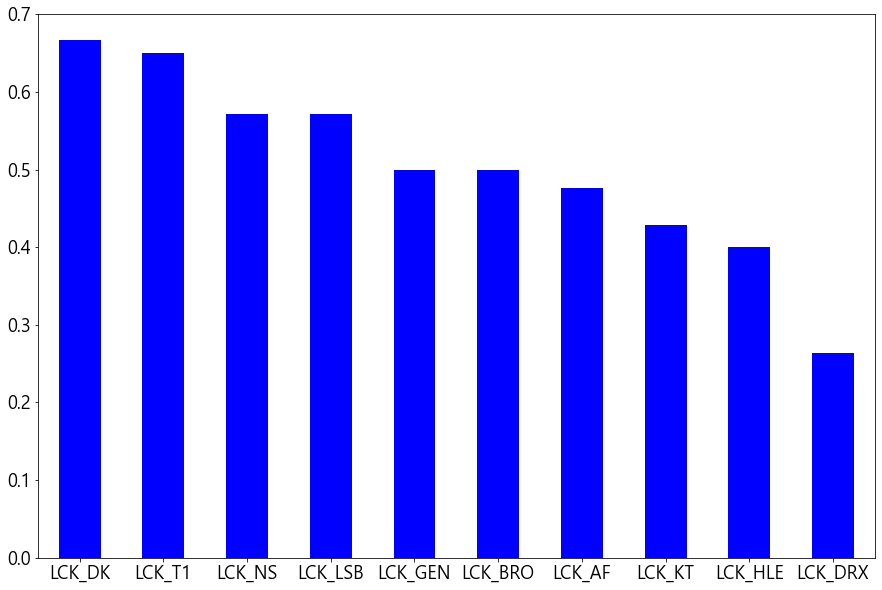

In [66]:
LCK_VIC_Per2_Blue.plot(kind='bar',figsize=(15, 10),fontsize=18, color='Blue')
plt.xticks(rotation =0);

## 레드진영 승률 순위

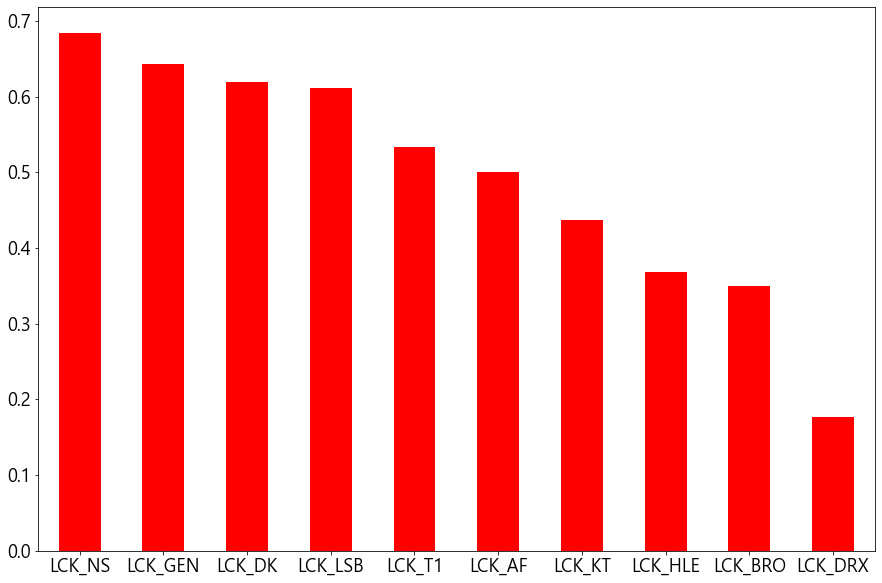

In [67]:
LCK_VIC_Per2_Red.plot(kind='bar',figsize=(15, 10),fontsize=18, color='Red')
plt.xticks(rotation =0);

### 진영별 승률이 가장 많이 차이 나는 팀

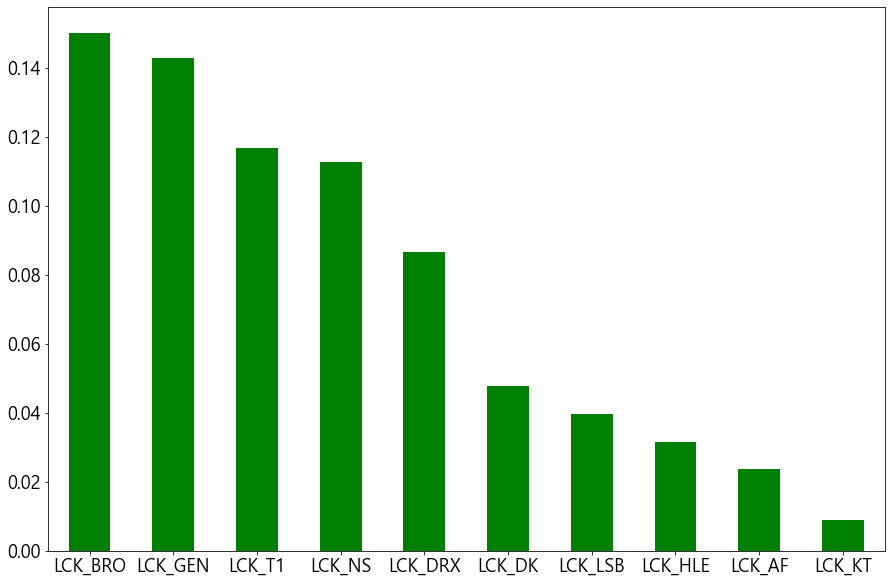

In [68]:
LCK_VIC_Per2_Dif.plot(kind='bar',figsize=(15, 10),fontsize=18, color='Green')
plt.xticks(rotation =0);

### 통합 승률

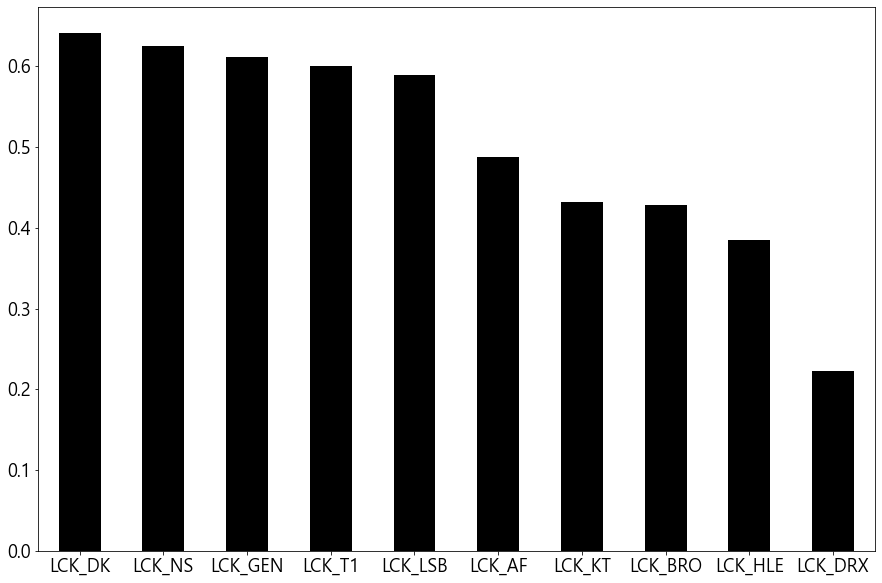

In [69]:
LCK_VIC_Per2['Vic'].plot(kind='bar', figsize=(15,10), fontsize=18, color='black')
plt.xticks(rotation=0);

### 승률 비교

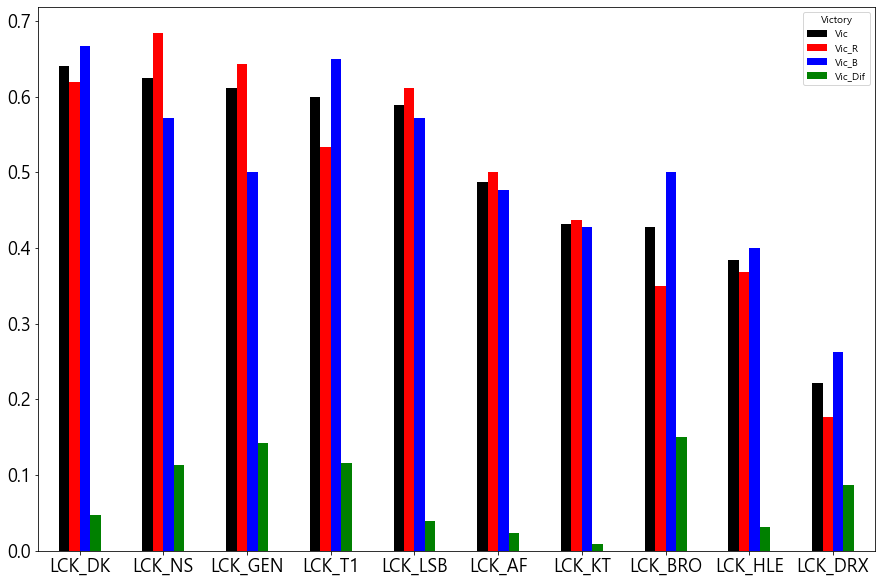

In [70]:
colors = ['black','red','blue', 'Green']
LCK_VIC_Per2.plot(kind='bar',figsize=(15, 10),fontsize=18, color=colors)
plt.xticks(rotation =0);

======================================================================================

# LCK 2021 Summer 한 게임당 가장 많은 와드를 설치한 선수

In [71]:
MostWards = LCK_Summer_Use.groupby(LCK_Summer_Use['Team Player']).mean().sort_values('Wards Placed', ascending = False).head(11)
MostWards

,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed
Team Player,,,,,,,,,,,,
NS Kellin,62.300000,13.025000,6.625000,1.250000,0.775000,2.550000,5.571667,5.252500,23.362500,1.662500,0.282500,62.450000
LSB Effort,59.797436,11.769231,6.589744,1.076923,0.846154,2.589744,4.369719,3.392308,18.715385,1.615385,0.302564,62.153846
AF Lehends,62.497436,10.948718,5.692308,0.794872,0.666667,2.564103,5.124786,4.453846,29.928205,1.151282,0.312821,60.128205
T1 Keria,60.102857,11.714286,7.285714,1.257143,0.771429,2.200000,4.712857,5.022857,35.068571,2.160000,0.508571,60.028571
BRO Delight,57.200000,10.047619,4.952381,0.666667,0.500000,2.666667,5.265646,4.173810,22.333333,2.178571,0.414286,58.785714
HLE Vsta,58.205128,11.487179,5.102564,0.641026,0.435897,1.820513,4.471001,4.487179,19.802564,1.328205,0.187179,54.974359
DK BeryL,58.928205,13.948718,6.948718,1.282051,1.025641,2.487179,5.355495,5.602564,28.394872,2.133333,0.648718,54.128205
GEN Life,60.177778,13.555556,6.472222,0.916667,0.805556,2.666667,5.677579,3.591667,17.908333,1.502778,0.383333,54.055556
DRX Jun,55.823529,10.058824,4.705882,0.588235,0.352941,1.529412,3.838515,4.717647,26.623529,1.482353,0.229412,52.470588


In [72]:
## MostWards.drop('AF MapSSi', inplace = True) # AF MapSSi는 출전 경기횟수가 적어 제외

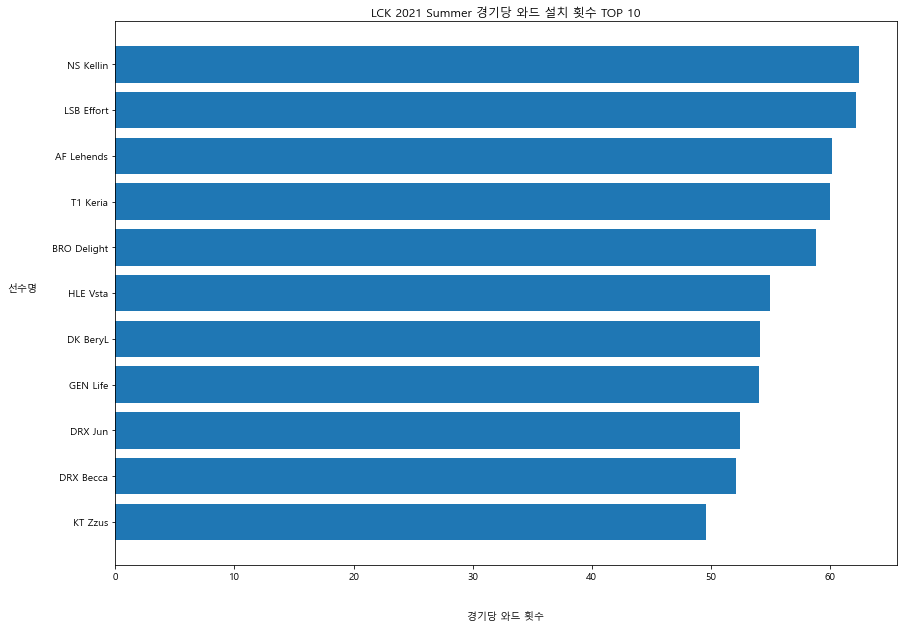

In [73]:
plt.figure(figsize=(14,10))
plt.barh(MostWards.index, MostWards['Wards Placed'])
plt.ylabel("선수명", rotation = 360, labelpad = 30)
plt.xlabel("경기당 와드 횟수", rotation = 360, labelpad = 30)
plt.title("LCK 2021 Summer 경기당 와드 설치 횟수 TOP 10")
plt.gca().invert_yaxis() # 정렬

# LCK 2021 Summer KDA TOP 10

In [74]:
KDA10 = LCK_Summer_Use.groupby(LCK_Summer_Use['Team Player']).mean().sort_values('KDA', ascending = False).head(11)
KDA10

,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed
Team Player,,,,,,,,,,,,
T1 Teddy,62.947059,12.411765,7.117647,1.352941,0.941176,2.529412,8.265686,19.982353,232.876471,15.252941,4.182353,27.588235
DK Malrang,58.860000,13.800000,7.300000,1.400000,1.000000,2.400000,8.236667,10.010000,169.370000,28.970000,1.530000,16.200000
DK ShowMaker,58.928205,13.948718,6.948718,1.282051,1.025641,2.487179,7.663675,16.971795,185.643590,12.815385,3.935897,18.256410
DK Ghost,58.951724,14.000000,6.827586,1.241379,1.034483,2.517241,7.152874,15.751724,184.200000,13.931034,4.372414,25.586207
GEN Ruler,60.177778,13.555556,6.472222,0.916667,0.805556,2.666667,7.092593,20.350000,230.341667,17.711111,5.533333,26.527778
DK Canyon,58.928205,13.948718,6.948718,1.282051,1.025641,2.487179,7.031136,12.848718,192.302564,28.443590,2.792308,12.974359
BRO Chieftain,55.600000,12.000000,6.000000,1.000000,0.500000,3.000000,7.000000,10.400000,150.350000,17.100000,0.750000,14.000000
NS Peanut,62.300000,13.025000,6.625000,1.250000,0.775000,2.550000,6.651667,12.610000,226.577500,31.327500,1.205000,16.750000
GEN Bdd,60.177778,13.555556,6.472222,0.916667,0.805556,2.666667,6.643981,15.008333,172.822222,9.394444,3.166667,14.000000


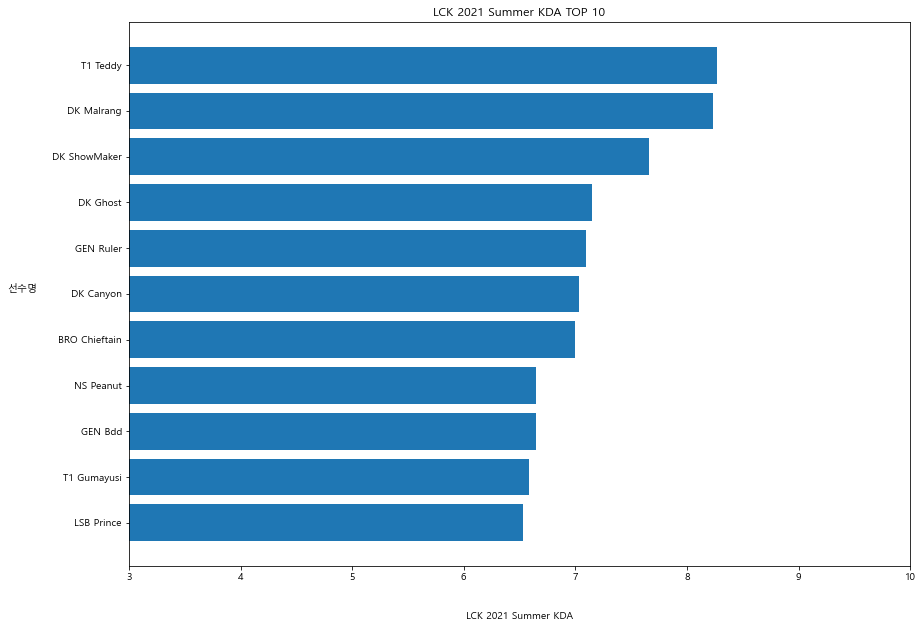

In [75]:
plt.figure(figsize=(14,10))
plt.barh(KDA10.index, KDA10['KDA'])
plt.ylabel("선수명", rotation = 360, labelpad = 30)
plt.xlabel("LCK 2021 Summer KDA", rotation = 360, labelpad = 30)
plt.xlim(3, 10, 0.5)
plt.title("LCK 2021 Summer KDA TOP 10")
plt.gca().invert_yaxis() # 정렬

In [76]:
# KDA TOP10 지정할 때 20경기 이상 나온 선수만 뽑아보기
LCK_Summer_Use['Team Player'].value_counts()

BRO Hena         42
BRO Hoya         42
BRO Delight      42
NS deokdam       40
BRO UmTi         40
                 ..
BRO Yaharong      3
GEN Burdol        2
BRO Chieftain     2
DRX Destroy       1
KT GIDEON         1
Name: Team Player, Length: 69, dtype: int64

# LCK 2021 Summer Team Stats

In [77]:
TeamStats

,Team,GP,W,L,AGT,K,D,KD,CKPM,GPR,...,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%,WPM,CWPM,WCPM
0,Afreeca Freecs,39,19,20,35.7,427,434,0.98,0.62,0.13,...,51%,51%,67%,33%,46%,50.4%,47.5%,3.87,1.48,2.03
1,DRX,36,8,28,32.7,317,521,0.61,0.71,-0.73,...,39%,35%,0%,25%,21%,49.7%,48.9%,3.46,1.39,1.67
2,DWG KIA,39,25,14,32.4,544,471,1.15,0.80,0.26,...,44%,57%,20%,64%,73%,49.3%,53.0%,3.72,1.53,1.73
3,Fredit BRION,42,18,24,33.1,422,450,0.94,0.63,-0.56,...,69%,56%,71%,38%,39%,49.7%,49.1%,4.02,1.67,1.95
4,Gen.G,36,22,14,33.2,488,381,1.28,0.72,0.10,...,53%,56%,67%,53%,60%,50.7%,51.2%,3.84,1.64,1.88
5,Hanwha Life Esports,39,15,24,33.2,448,512,0.88,0.74,0.18,...,33%,40%,50%,33%,35%,50.7%,48.4%,3.46,1.53,1.76
6,KT Rolster,37,16,21,31.7,434,467,0.93,0.77,-0.07,...,46%,46%,67%,46%,50%,50.1%,49.6%,3.40,1.63,1.64
7,Liiv SANDBOX,39,23,16,33.5,459,469,0.98,0.71,0.05,...,54%,55%,60%,64%,56%,50.2%,48.9%,3.76,1.61,1.83
8,Nongshim RedForce,40,25,15,34.9,521,438,1.19,0.69,-0.19,...,60%,52%,33%,55%,55%,49.3%,51.4%,3.60,1.31,1.89
9,T1,37,21,16,34.4,442,371,1.19,0.64,0.82,...,49%,49%,67%,57%,55%,49.9%,52.1%,4.19,1.74,1.80


In [78]:
# 숫자형으로 변환
TeamStats['FB%'] = TeamStats['FB%'].str.strip('%').apply(pd.to_numeric)
TeamStats['FT%'] = TeamStats['FT%'].str.strip('%').apply(pd.to_numeric)
TeamStats['F3T%'] = TeamStats['F3T%'].str.strip('%').apply(pd.to_numeric)
TeamStats['HLD%'] = TeamStats['HLD%'].str.strip('%').apply(pd.to_numeric)
TeamStats['FD%'] = TeamStats['FD%'].str.strip('%').apply(pd.to_numeric)
TeamStats['DRG%'] = TeamStats['DRG%'].str.strip('%').apply(pd.to_numeric)
TeamStats['ELD%'] = TeamStats['ELD%'].str.strip('%').apply(pd.to_numeric)
TeamStats['FBN%'] = TeamStats['FBN%'].str.strip('%').apply(pd.to_numeric)
TeamStats['BN%'] = TeamStats['BN%'].str.strip('%').apply(pd.to_numeric)
TeamStats['LNE%'] = TeamStats['LNE%'].str.strip('%').apply(pd.to_numeric)
TeamStats['JNG%'] = TeamStats['JNG%'].str.strip('%').apply(pd.to_numeric)

In [79]:
sorted(TeamStats.columns)

['AGT',
 'BN%',
 'CKPM',
 'CWPM',
 'D',
 'DRG%',
 'EGR',
 'ELD%',
 'F3T%',
 'FB%',
 'FBN%',
 'FD%',
 'FT%',
 'GD15',
 'GP',
 'GPR',
 'GSPD',
 'HLD%',
 'JNG%',
 'K',
 'KD',
 'L',
 'LNE%',
 'MLR',
 'Team',
 'W',
 'WCPM',
 'WPM']

* AGT	Average game time/duration, in minutes

* BN%	Baron control rate

* CKPM	Average combined kills per minute (team kills + opponent kills)

* CWPM	Control wards purchased per minute

* D	Total deaths

* DRG%	Dragon control rate: percent of all Dragons killed that were taken by the team, reflecting only elemental drakes if ELD% is present

* EGR	Early-Game Rating

* ELD%	Elder dragon control rate

* F3T%	First-to-three-towers rate (percentage of games in which team was the first to 3 tower kills

* FB%	First Blood rate -- for players/champions, percent of games earning a First Blood participation (kill or assist)

* FBN%	First Baron rate

* FD%	First dragon rate

* FT%	First tower rate

* GD15	Average gold difference at 15 minutes

* GP	Games Played

* GPR	Gold percent rating (average amount of game’s total gold held, relative to 50%)

* GSPD	Average gold spent percentage difference

* HLD%	Rift Herald control rate

* JNG%	Jungle Control: average share of game’s total jungle CS

* K	Total kills

* KD	Kill-to-Death Ratio

* L	Losses

* LNE%	Lane Control: average share of game’s total lane CS

* MLR	Mid/Late Rating

* Team	Team name

* W	Wins

* WCPM	Average wards cleared per minute

* WPM	Average wards placed per minute

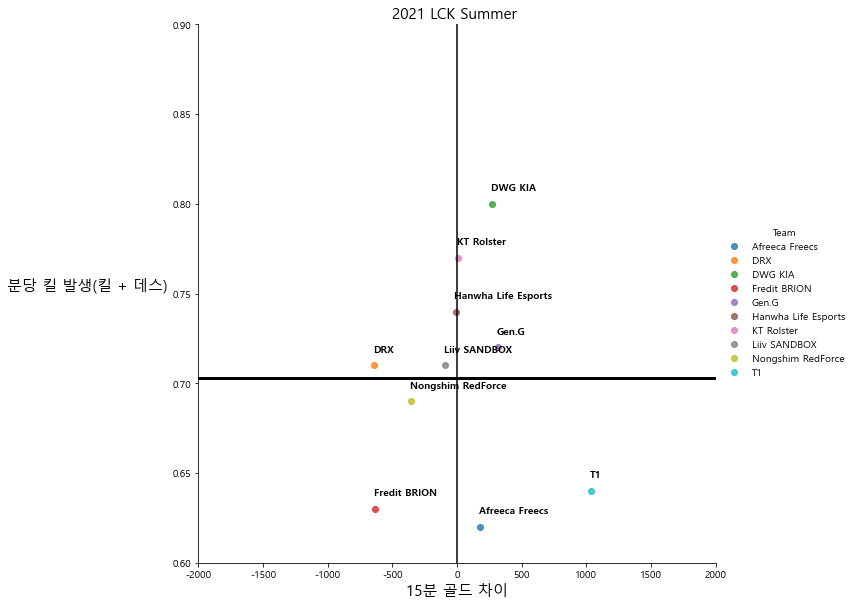

In [92]:
# 킬 발생, 15분 골드 차이를 기준으로 4사분면으로 나눈 차트
# 분당 킬 발생(CKPM)은 교전지향적인 팀인지 교전을 피하는 팀인지 확인하는 지표
# 15분 골드차이(GD15)는 초반부터 상대를 압박하고, 교전에서 이득을 보는지 여부를 나타내는 지표

GPR_KD = sns.lmplot(x='GD15', y='CKPM', hue = 'Team', data=TeamStats, fit_reg=False, truncate=False, height = 8)
#sns.regplot(x='GD15', y='CKPM', data=df, scatter=False, ax=GPR_KD.axes[0,0])

GPR_KD.set(ylim=(0.6, 0.9))
GPR_KD.set(xlim=(-2000, 2000))

for i in range(TeamStats.shape[0]):
 plt.text(x=TeamStats.GD15[i]-10,
          y=TeamStats.CKPM[i]+0.0075,
          s=TeamStats.Team[i], 
          fontdict=dict(fontweight = 'bold',size=10))

plt.axhline(y=TeamStats['CKPM'].mean(),color='black',label='평균 CKPM',linewidth=3)
plt.axvline(x=0, color='black')

plt.xlabel('15분 골드 차이', fontsize = 15)
plt.ylabel('분당 킬 발생(킬 + 데스)', rotation= 360, labelpad = 85, fontsize = 15)
plt.title('LCK 2021 Summer ', fontsize = 15);